In [293]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

params = {'axes.labelsize'  : 14.5,
          'axes.titlesize'  : 14.5,
          'font.size'       : 13,
          'legend.fontsize' : 13,
          'xtick.labelsize' : 14.5,
          'ytick.labelsize' : 14.5}
plt.rcParams.update(params)
plt.rcParams.update({'figure.max_open_warning': 0})

# %config InlineBackend.figure_format = 'retina'

*RQ1:* How much effort does it take for human annotators to generate segmentations for cell images of varying detail using GrabCut as an interactive segmentation approach?

Effort:

* Mean maximum `submission_counter` per `image_id`
* Time per submission per `image_id` per `session_id`
* For Kromp dataset: Percentage of annotated pixels compared to ground truth mask.

In [294]:
IAR_FILEPATH = 'postgres/20210925-084713_grab_cut_interaction.csv'
MASK_FILEPATH = 'postgres/20210925-084713_grab_cut_mask.csv'

IMG_SHAPE = (384, 512)

In [295]:
interactions_df = pd.read_csv(IAR_FILEPATH)

# Drop unneeded columns
# interactions_df.drop('id', axis=1, inplace=True)

interactions_df['first_interaction_time'] = pd.to_datetime(interactions_df['first_interaction_time'], utc=True)
interactions_df['submission_time'] = pd.to_datetime(interactions_df['submission_time'], utc=True)

interactions_df.astype({'session_id': 'string'})
interactions_df.astype({'image_id': 'string'})

# Drop columns with application bugs
interactions_df.drop([0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

interactions_df = interactions_df.rename(columns={'id': 'interaction_uuid'})

interactions_df.head()

,interaction_uuid,session_id,image_id,annotated_pixels,foreground_pixels,background_pixels,scribbles,foreground_scribbles,background_scribbles,submission_counter,first_interaction_time,submission_time
8,2e394d13-9041-483e-b566-10df0b6762ca,buma1augyolmgo3vgr65wp8umbdphu8377ga3xtp5mgkz1...,lym17,3247,169,3078,2,1,1,1,2021-09-16 08:04:44+00:00,2021-09-16 08:04:55+00:00
9,1ae4644c-1577-4650-b435-a95bc07b12bc,buma1augyolmgo3vgr65wp8umbdphu8377ga3xtp5mgkz1...,lym17,3582,169,3413,3,1,2,2,2021-09-16 08:04:44+00:00,2021-09-16 08:07:23+00:00
10,0332439e-ed63-483b-bb7b-5dccd69d328e,buma1augyolmgo3vgr65wp8umbdphu8377ga3xtp5mgkz1...,neu12,2636,711,1925,12,7,5,1,2021-09-16 08:07:41+00:00,2021-09-16 08:08:14+00:00
11,9baf625c-6360-4cfb-ad82-09397570dc36,buma1augyolmgo3vgr65wp8umbdphu8377ga3xtp5mgkz1...,neu12,2829,711,2118,16,7,9,2,2021-09-16 08:07:41+00:00,2021-09-16 08:08:32+00:00
12,4483fb66-5861-4917-91e2-e1e1a0064e7e,buma1augyolmgo3vgr65wp8umbdphu8377ga3xtp5mgkz1...,neu12,2928,711,2217,20,7,13,3,2021-09-16 08:07:41+00:00,2021-09-16 08:08:52+00:00


In [296]:
# Print columns & dtypes
interactions_df.dtypes

interaction_uuid                       object
session_id                             object
image_id                               object
annotated_pixels                        int64
foreground_pixels                       int64
background_pixels                       int64
scribbles                               int64
foreground_scribbles                    int64
background_scribbles                    int64
submission_counter                      int64
first_interaction_time    datetime64[ns, UTC]
submission_time           datetime64[ns, UTC]
dtype: object

In [297]:
masks_df = pd.read_csv(MASK_FILEPATH)

# Drop unneeded columns
# masks_df.drop('id', axis=1, inplace=True)
masks_df.drop('mask', axis=1, inplace=True)
masks_df = masks_df.rename(columns={'id': 'mask_uuid'})


masks_df.head()

,mask_uuid,session_id,image_id,interactionrecord_id
0,512c2c8e-67d1-439a-8a5d-2507ceb4a218,vhz6pnu25552vmmvh7xuizmxdjvhqvkpgk5mfuh3b41nj4...,lym0,43a8cf85-e3a2-4eea-9700-7a5883b14004
1,bb9ad764-bfbf-40aa-a839-951e2bb49618,vhz6pnu25552vmmvh7xuizmxdjvhqvkpgk5mfuh3b41nj4...,neu0,e2ea3db1-1d65-41c7-8b60-4340b097cfbf
2,d5c74907-94bf-402e-9865-1a32252766cf,vhz6pnu25552vmmvh7xuizmxdjvhqvkpgk5mfuh3b41nj4...,agg17,c7552430-d08c-47d8-a3f9-adc36b3ecd4c
3,9eb3af85-44f5-444c-acd1-364245fd696c,vhz6pnu25552vmmvh7xuizmxdjvhqvkpgk5mfuh3b41nj4...,neurblas5,96fe213c-caa8-4627-9db2-9988c6907aaf
4,9e25ad11-7d96-4b17-a80f-06c93d4d6d4e,buma1augyolmgo3vgr65wp8umbdphu8377ga3xtp5mgkz1...,lym17,1ae4644c-1577-4650-b435-a95bc07b12bc


In [298]:
# Print columns & dtypes
masks_df.dtypes

mask_uuid               object
session_id              object
image_id                object
interactionrecord_id    object
dtype: object

In [299]:
print(f'IAR: \t{len(interactions_df)}-times segmentations requested')
print(f'Masks: \t{len(masks_df)} masks created')

IAR: 	146-times segmentations requested
Masks: 	53 masks created


In [300]:
# Images that have been worked on
requested_images = interactions_df['image_id'].unique()
print(f"{requested_images} -- {len(requested_images)} out of 13 have been requested by all participants so far")

['lym17' 'neu12' 'agg185' 'normal2' 'lym0' 'neu90' 'agg23' 'neurblas10'
 'neu0' 'neurblas5' 'agg17'] -- 11 out of 13 have been requested by all participants so far


In [301]:
# Only process images where the participants have actually submitted their mask
finished_df = pd.merge(interactions_df, masks_df, how="inner", on=["session_id", "image_id"])
print(f'IAR: Segmentations requested {len(finished_df)}-times given that a final mask choice was submitted')

IAR: Segmentations requested 122-times given that a final mask choice was submitted


In [302]:
finished_df.dtypes

interaction_uuid                       object
session_id                             object
image_id                               object
annotated_pixels                        int64
foreground_pixels                       int64
background_pixels                       int64
scribbles                               int64
foreground_scribbles                    int64
background_scribbles                    int64
submission_counter                      int64
first_interaction_time    datetime64[ns, UTC]
submission_time           datetime64[ns, UTC]
mask_uuid                              object
interactionrecord_id                   object
dtype: object

In [303]:
# df_max_submission_per_image_per_session = finished_df.groupby(['session_id', 'image_id']).max().reset_index(level='image_id').reset_index(drop=True).rename({'submission_counter': 'total_submissions'})
df_final_interaction_per_image_per_session = finished_df.groupby(['session_id', 'image_id']).max().reset_index(level='image_id').reset_index(drop=True)

df_final_interaction_per_image_per_session = df_final_interaction_per_image_per_session.rename(columns={
    'submission_counter': 'total_submissions'
})

df_final_interaction_per_image_per_session.head()

,image_id,interaction_uuid,annotated_pixels,foreground_pixels,background_pixels,scribbles,foreground_scribbles,background_scribbles,total_submissions,first_interaction_time,submission_time,mask_uuid,interactionrecord_id
0,lym0,85125518-8941-4bb0-83a9-2946982bc946,1526,87,1439,2,1,1,1,2021-09-20 08:13:19+00:00,2021-09-20 08:13:31+00:00,4bd5e622-eccd-4cdc-a04c-00646dff353c,85125518-8941-4bb0-83a9-2946982bc946
1,neu0,9a725cac-9936-4214-9229-091eee5644a0,2880,1653,2047,10,9,1,2,2021-09-20 08:14:03+00:00,2021-09-20 08:16:39+00:00,c6fa4a32-e259-4451-854d-e3231097963c,9a725cac-9936-4214-9229-091eee5644a0
2,lym0,782df9ed-6aae-4c18-9134-23fd531e3c00,321,23,298,2,1,1,1,2021-09-20 08:27:16+00:00,2021-09-20 08:27:20+00:00,2e4b60a8-5467-4b12-a98c-80d029143020,782df9ed-6aae-4c18-9134-23fd531e3c00
3,agg185,fc115a7d-e8a1-443b-9ad8-fbd9d3d0fe7e,13151,109,13042,14,4,10,3,2021-09-20 08:59:23+00:00,2021-09-20 09:00:45+00:00,fa8c53c7-624d-461e-850d-0156be174da8,02de857b-c4da-4e3b-82b3-da44e50d3166
4,lym17,4f678c81-43f0-4e31-bf7b-68d9f4ae3714,1304,52,1252,2,1,1,1,2021-09-20 08:58:27+00:00,2021-09-20 08:58:31+00:00,86cfff11-1db9-4fa3-aee3-e2059094dee3,4f678c81-43f0-4e31-bf7b-68d9f4ae3714


In [304]:
print(f'We are considering {len(df_final_interaction_per_image_per_session)} interactions where the mask was submitted.')

We are considering 49 interactions where the mask was submitted.


In [305]:
df_final_interaction_per_image_per_session['interaction_duration'] = df_final_interaction_per_image_per_session['submission_time'] - df_final_interaction_per_image_per_session['first_interaction_time']

In [306]:
# df_total_submissions_per_image_per_session.drop('first_interaction_time', axis=1, inplace=True)
# df_total_submissions_per_image_per_session.drop('submission_time', axis=1, inplace=True)

In [309]:
# df_mean_submission_per_image_per_session = df_max_submission_per_image_per_session.groupby('image_id').agg({'interaction_duration': [('mean_interaction_duration', 'mean')]})

In [310]:
df_interaction_time_per_image_per_session = df_final_interaction_per_image_per_session[['image_id', 'interaction_duration', 'mask_uuid']]
df_submissions_per_image_per_session = df_final_interaction_per_image_per_session[['image_id', 'total_submissions']]

In [311]:
df_interaction_time_per_image_per_session['interaction_duration_seconds'] = df_interaction_time_per_image_per_session['interaction_duration'].dt.total_seconds()
df_interaction_time_per_image_per_session

<ipython-input-311-f0d48e371fe2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interaction_time_per_image_per_session['interaction_duration_seconds'] = df_interaction_time_per_image_per_session['interaction_duration'].dt.total_seconds()


,image_id,interaction_duration,mask_uuid,interaction_duration_seconds
0,lym0,0 days 00:00:12,4bd5e622-eccd-4cdc-a04c-00646dff353c,12.0
1,neu0,0 days 00:02:36,c6fa4a32-e259-4451-854d-e3231097963c,156.0
2,lym0,0 days 00:00:04,2e4b60a8-5467-4b12-a98c-80d029143020,4.0
3,agg185,0 days 00:01:22,fa8c53c7-624d-461e-850d-0156be174da8,82.0
4,lym17,0 days 00:00:04,86cfff11-1db9-4fa3-aee3-e2059094dee3,4.0
5,neu0,0 days 00:00:20,ff7b3361-e413-42fb-b027-e022d596453d,20.0
6,neurblas5,0 days 00:00:54,8d73023b-2206-419d-a813-463033e985ab,54.0
7,agg23,0 days 00:01:49,184c62f4-ad5e-4d60-b3f5-11211ad69c7d,109.0
8,lym0,0 days 00:01:41,2e51ba65-0ac5-49af-b170-5faef00a7d5f,101.0
9,neu90,0 days 00:01:07,ab352899-cf2e-4557-80a6-a5c65db18186,67.0


### Time per submission per `image_id` per `session_id`

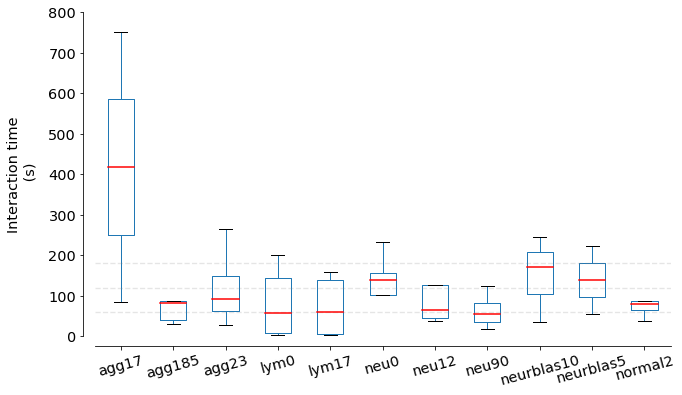

In [312]:
fig, ax = plt.subplots(figsize=(10, 6))

bp = df_interaction_time_per_image_per_session.boxplot(
    column=['interaction_duration_seconds'],
    by='image_id',
    ax=ax,
    sym='',
    medianprops={'linewidth': 1.5},
    return_type='dict',
)

for key in bp.keys():
    for item in bp[key]['medians']:
        item.set_color('red')

plt.grid(b=False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.03))
ax.spines['left'].set_position(('axes', -0.02))

ax.axhline(60, color='grey', alpha=0.2, linestyle='dashed', linewidth=1.4)
ax.axhline(120, color='grey', alpha=0.2, linestyle='dashed', linewidth=1.4)
ax.axhline(180, color='grey', alpha=0.2, linestyle='dashed', linewidth=1.4)

fig.canvas.draw()

ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('Interaction time\n (s)')
ax.yaxis.labelpad = 11

fig.suptitle('')
ax.set_ylim([0, 800])

plt.xticks(rotation=15)
plt.show()

* Limitation: We can't control if people take breaks during the labeling session, this affects the interaction time per image.

### Submissions per `image_id` per `session_id`

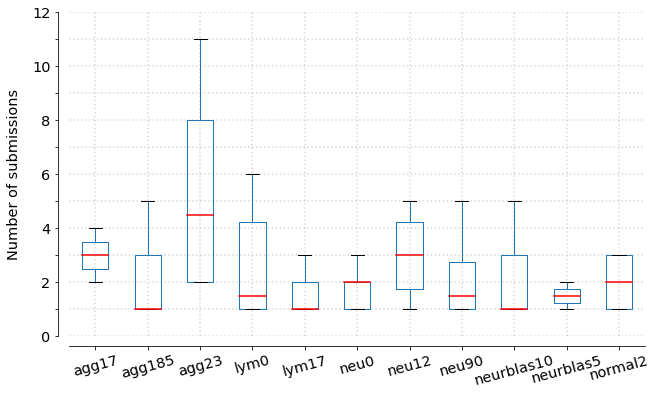

In [313]:
fig, ax = plt.subplots(figsize=(10, 6))

bp = df_submissions_per_image_per_session.boxplot(
    column=['total_submissions'],
    by='image_id',
    ax=ax,
    sym='',
    medianprops={'linewidth': 1.5},
    return_type='dict',
)

for key in bp.keys():
    for item in bp[key]['medians']:
        item.set_color('red')

# ax.grid(False)
plt.grid(b=True, color='grey', alpha=0.3, linestyle='dotted', linewidth=1.5)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.03))
ax.spines['left'].set_position(('axes', -0.02))

fig.canvas.draw()

ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('Number of submissions')
ax.yaxis.labelpad = 11
ax.yaxis.set_ticks(range(0, 13, 1))

y_labels = [item.get_text() for item in ax.get_yticklabels()]

# print(ax.get_yticklabels())
# print(y_labels)

new_y_labels = [
    '' if i % 2 != 0 else str(i) for i in range(len(y_labels))]
ax.set_yticklabels(new_y_labels)

fig.suptitle('')

plt.xticks(rotation=15)
plt.show()

In [314]:
kromp_gt = np.load('kromp_gt.npz')

# keys = ['neurblas5', 'neurblas16', 'neurblas10', 'normal2', 'normal4']

d = {
    'image_id': ['neurblas5', 'neurblas16', 'neurblas10', 'normal2', 'normal4'],
    'bg_pixels': [
        np.count_nonzero(kromp_gt['neurblas5'] == 0),
        np.count_nonzero(kromp_gt['neurblas16'] == 0),
        np.count_nonzero(kromp_gt['neurblas10'] == 0),
        np.count_nonzero(kromp_gt['normal2'] == 0),
        np.count_nonzero(kromp_gt['normal4'] == 0),
    ],
    'fg_pixels': [
        np.count_nonzero(kromp_gt['neurblas5'] == 1),
        np.count_nonzero(kromp_gt['neurblas16'] == 1),
        np.count_nonzero(kromp_gt['neurblas10'] == 1),
        np.count_nonzero(kromp_gt['normal2'] == 1),
        np.count_nonzero(kromp_gt['normal4'] == 1),
    ],
}

gt_pixels_df = pd.DataFrame(data=d)

gt_pixels_df.head()

,image_id,bg_pixels,fg_pixels
0,neurblas5,174380,22228
1,neurblas16,183232,13376
2,neurblas10,179130,17478
3,normal2,158099,38509
4,normal4,177649,18959


In [315]:
gt_percentages_df = pd.merge(df_final_interaction_per_image_per_session, gt_pixels_df, how="inner", on="image_id")

gt_percentages_df = gt_percentages_df.rename(
    columns={'bg_pixels': 'background_pixels_gt', 'fg_pixels': 'foreground_pixels_gt'}
    # inplace=True
)

In [316]:
gt_percentages_df['annotated_fg_pixels_percentage'] = gt_percentages_df['foreground_pixels'] / gt_percentages_df['foreground_pixels_gt']

gt_percentages_df['annotated_bg_pixels_percentage'] = gt_percentages_df['background_pixels'] / gt_percentages_df['background_pixels_gt']

gt_percentages_df

,image_id,interaction_uuid,annotated_pixels,foreground_pixels,background_pixels,scribbles,foreground_scribbles,background_scribbles,total_submissions,first_interaction_time,submission_time,mask_uuid,interactionrecord_id,interaction_duration,background_pixels_gt,foreground_pixels_gt,annotated_fg_pixels_percentage,annotated_bg_pixels_percentage
0,neurblas5,d625c918-dd13-40fe-a117-3b2b1f995275,5814,4171,1643,6,5,1,2,2021-09-20 09:01:01+00:00,2021-09-20 09:01:55+00:00,8d73023b-2206-419d-a813-463033e985ab,d625c918-dd13-40fe-a117-3b2b1f995275,0 days 00:00:54,174380,22228,0.187646,0.009422
1,neurblas5,9c1a74ef-b429-485f-b232-ee938c6a5a0a,34737,15096,19641,43,14,29,1,2021-09-23 13:05:25+00:00,2021-09-23 13:09:09+00:00,8a4c8419-74f5-4933-93ad-34fd7c977c47,9c1a74ef-b429-485f-b232-ee938c6a5a0a,0 days 00:03:44,174380,22228,0.679143,0.112633
2,normal2,fd6ee920-2aaa-4431-be43-059185427603,2176,166,2010,8,3,5,3,2021-09-16 08:44:02+00:00,2021-09-16 08:44:41+00:00,fd927f7c-a9f7-4b8f-8890-5a1da2da20db,0be7ddd5-110c-4256-8e94-9ec307644f10,0 days 00:00:39,158099,38509,0.004311,0.012714
3,normal2,29eb6b42-8029-4935-a905-76a462c1aa2d,1895,992,1288,18,12,6,2,2021-09-20 20:42:03+00:00,2021-09-20 20:43:30+00:00,bb5b3bff-38f4-42cf-931e-977aba77ed1c,29eb6b42-8029-4935-a905-76a462c1aa2d,0 days 00:01:27,158099,38509,0.025760,0.008147
4,normal2,b16148f3-bb8c-4c50-b49e-504888d51b8c,16280,6187,10093,17,9,8,3,2021-09-16 08:11:16+00:00,2021-09-16 08:12:22+00:00,54158809-ecdb-4c57-8964-c2d50ea0924a,8a999cdd-8e7e-4ac6-bb87-cd8cee583349,0 days 00:01:06,158099,38509,0.160664,0.063840
5,normal2,788e285a-e0e2-4dda-ac7f-b298344b8564,42961,3822,39139,72,32,40,1,2021-09-20 22:15:41+00:00,2021-09-20 22:19:02+00:00,00404c8c-d313-40fd-b101-e6c05720ceb9,788e285a-e0e2-4dda-ac7f-b298344b8564,0 days 00:03:21,158099,38509,0.099250,0.247560
6,normal2,c4a7c28f-392a-45ad-b4e5-3eef04d49629,30164,17314,12850,36,32,4,1,2021-09-21 17:58:57+00:00,2021-09-21 18:00:17+00:00,5d697102-1fc8-4739-8f9e-579f78d96e9b,c4a7c28f-392a-45ad-b4e5-3eef04d49629,0 days 00:01:20,158099,38509,0.449609,0.081278
7,neurblas10,25703646-31d0-4eb2-aa50-20e44c53431b,511,445,66,15,14,1,1,2021-09-18 13:44:29+00:00,2021-09-18 13:45:04+00:00,141fecea-3f35-4e4e-a021-d4af38a36ac2,25703646-31d0-4eb2-aa50-20e44c53431b,0 days 00:00:35,179130,17478,0.025461,0.000368
8,neurblas10,8352fe67-8444-4a57-ad02-324e83529794,27650,2138,25516,13,10,3,5,2021-09-20 09:21:43+00:00,2021-09-20 09:24:35+00:00,d5a2aea8-1bd8-4ee1-9ca8-2b43eee0e4ee,608c2c43-8eff-4231-b50e-020358457588,0 days 00:02:52,179130,17478,0.122325,0.142444
9,neurblas10,061e0e91-4d29-4e39-95a4-249159c8642a,18975,18547,428,26,22,4,1,2021-09-21 07:53:37+00:00,2021-09-21 07:57:43+00:00,6f0b36a4-0846-4c13-9789-02b297ad0858,061e0e91-4d29-4e39-95a4-249159c8642a,0 days 00:04:06,179130,17478,1.061163,0.002389


In [317]:
gt_percentages_df['image_id'].unique()

array(['neurblas5', 'normal2', 'neurblas10'], dtype=object)

[Text(1, 0, 'neurblas10'), Text(2, 0, 'neurblas5'), Text(3, 0, 'normal2')]


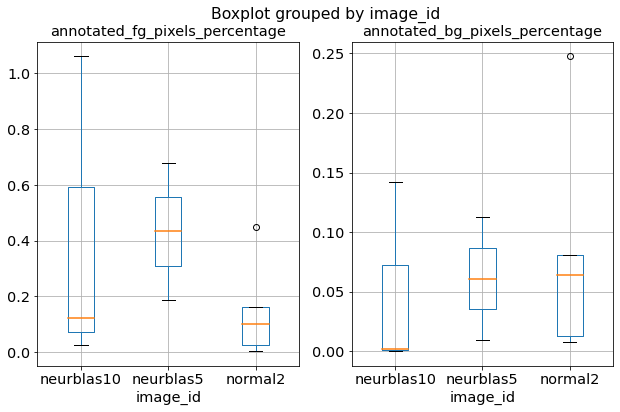

In [318]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

bp1 = gt_percentages_df.boxplot(
    column=['annotated_fg_pixels_percentage'],
    by='image_id',
    ax=ax[0],
    # sym='',
    medianprops={'linewidth': 1.5},
    return_type='dict',
)

bp2 = gt_percentages_df.boxplot(
    column=['annotated_bg_pixels_percentage'],
    by='image_id',
    ax=ax[1],
    # sym='',
    medianprops={'linewidth': 1.5},
    return_type='dict',
)

print(ax[0].get_xticklabels())

all_fg_y_whiskers = [whiskers.get_ydata()[1] for i, whiskers in enumerate(bp1['annotated_fg_pixels_percentage']['whiskers'])]
all_bg_y_whiskers = [whiskers.get_ydata()[1] for i, whiskers in enumerate(bp2['annotated_bg_pixels_percentage']['whiskers'])]

fg_whiskers_min = []
fg_whiskers_max = []

for i, y_val in enumerate(all_fg_y_whiskers):
    if i % 2 == 0: fg_whiskers_min.append(y_val)
    else: fg_whiskers_max.append(y_val)

bg_whiskers_min = []
bg_whiskers_max = []

for i, y_val in enumerate(all_bg_y_whiskers):
    if i % 2 == 0: bg_whiskers_min.append(y_val)
    else: bg_whiskers_max.append(y_val)

In [319]:
fg_whiskers_min_ordered = [fg_whiskers_min[1], fg_whiskers_min[0], fg_whiskers_min[2]]
fg_whiskers_max_ordered = [fg_whiskers_max[1], fg_whiskers_max[0], fg_whiskers_max[2]]

bg_whiskers_min_ordered = [bg_whiskers_min[1], bg_whiskers_min[0], bg_whiskers_min[2]]
bg_whiskers_max_ordered = [bg_whiskers_max[1], bg_whiskers_max[0], bg_whiskers_max[2]]

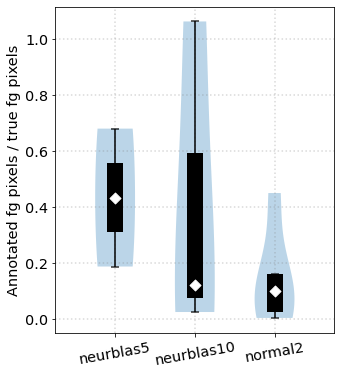

In [320]:
# def adjacent_values(vals, q1, q3):
#     iqr = q3 - q1
#     dist_above_iqr = q3 + 1.5 * iqr
#     dist_above_iqr = np.clip(dist_above_iqr, q3, vals[-1])
#
#     dist_below_iqr = q1 - 1.5 * iqr
#     dist_below_iqr = np.clip(dist_below_iqr, vals[0], q1)
#
#     insert_idx_higher_whisker = np.searchsorted(vals, dist_above_iqr, side='left')
#     insert_idx_lower_whisker = np.searchsorted(vals, dist_below_iqr, side='right')
#
#     if insert_idx_higher_whisker >= len(vals):
#         higher_whisker = vals[len(vals) - 1]
#     elif insert_idx_higher_whisker == 0:
#         higher_whisker = vals[0]
#     else:
#         higher_whisker = vals[insert_idx_higher_whisker - 1]
#
#     if insert_idx_lower_whisker >= len(vals):
#         lower_whisker = vals[len(vals) - 1]
#     elif insert_idx_lower_whisker == 0:
#         lower_whisker = vals[0]
#     else:
#         lower_whisker = vals[insert_idx_lower_whisker]
#
#     return lower_whisker, higher_whisker

# keys = ['neurblas5', 'neurblas16', 'neurblas10', 'normal2', 'normal4']
x_labels = ['neurblas5', 'neurblas10', 'normal2']

fg_data = [
    np.sort(gt_percentages_df[gt_percentages_df.image_id == 'neurblas5']["annotated_fg_pixels_percentage"].values),
    # np.sort(gt_percentages_df[gt_percentages_df.image_id == 'neurblas16']["annotated_fg_pixels_percentage"].values),
    np.sort(gt_percentages_df[gt_percentages_df.image_id == 'neurblas10']["annotated_fg_pixels_percentage"].values),
    np.sort(gt_percentages_df[gt_percentages_df.image_id == 'normal2']["annotated_fg_pixels_percentage"].values),
    # np.sort(gt_percentages_df[gt_percentages_df.image_id == 'normal4']["annotated_fg_pixels_percentage"].values)
]

max_values_length = max([vals.size for vals in fg_data])
fg_data_sorted_padded = [
    np.sort(np.pad(vals, pad_width=(0, max_values_length - vals.size), mode='constant', constant_values=np.nan))
    for vals in fg_data
]

bg_data = [
    np.sort(gt_percentages_df[gt_percentages_df.image_id == 'neurblas5']["annotated_bg_pixels_percentage"].values),
    # np.sort(gt_percentages_df[gt_percentages_df.image_id == 'neurblas16']["annotated_fg_pixels_percentage"].values),
    np.sort(gt_percentages_df[gt_percentages_df.image_id == 'neurblas10']["annotated_bg_pixels_percentage"].values),
    np.sort(gt_percentages_df[gt_percentages_df.image_id == 'normal2']["annotated_bg_pixels_percentage"].values),
    # np.sort(gt_percentages_df[gt_percentages_df.image_id == 'normal4']["annotated_fg_pixels_percentage"].values)
]

max_values_length = max([vals.size for vals in bg_data])
bg_data_sorted_padded = [
    np.sort(np.pad(vals, pad_width=(0, max_values_length - vals.size), mode='constant', constant_values=np.nan))
    for vals in bg_data
]

fig, ax = plt.subplots(figsize=(5, 6))

vp = ax.violinplot(dataset = fg_data,
                      showmeans=False,
                      showmedians=False,
                      showextrema=False)

for pc in vp['bodies']:
    pc.set_facecolor('#1f77b4')
    # pc.set_edgecolor('black')
    pc.set_alpha(0.3)

quartile1, medians, quartile3 = np.nanpercentile(fg_data_sorted_padded, [25, 50, 75], axis=1)
# whiskers = np.array([
#     adjacent_values(sorted_array, q1, q3)
    # for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
# whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, fg_whiskers_min_ordered, marker="_", color='k', s=50, zorder=3, alpha=0.8)
ax.scatter(inds, fg_whiskers_max_ordered, marker="_", color='k', s=50, zorder=3, alpha=0.8)
ax.vlines(inds, fg_whiskers_min_ordered, fg_whiskers_max_ordered, color='k', linestyle='-', lw=1.5)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=16)
ax.scatter(inds, medians, marker="D", color='w', s=60, zorder=3)
# ax.vlines(inds, whiskers_min, whiskers_max, color='#165683', linestyle='-', lw=1, alpha=0.7)

ax.set_ylabel('Annotated fg pixels / true fg pixels')

ax.set_xticks(np.arange(1, len(x_labels) + 1))
ax.set_xticklabels(x_labels, rotation=10)
ax.set_xlim(0.25, len(x_labels) + 0.75)

plt.grid(b=True, color='grey', alpha=0.3, linestyle='dotted', linewidth=1.5)
plt.show()

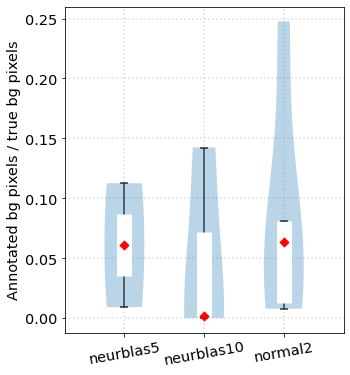

In [321]:
x_labels = ['neurblas5', 'neurblas10', 'normal2']

fig, ax = plt.subplots(figsize=(5, 6))

vp = ax.violinplot(dataset = bg_data,
                      showmeans=False,
                      showmedians=False,
                      showextrema=False)

for pc in vp['bodies']:
    pc.set_facecolor('#1f77b4')
    # pc.set_edgecolor('black')
    pc.set_alpha(0.3)

quartile1, medians, quartile3 = np.nanpercentile(bg_data_sorted_padded, [25, 50, 75], axis=1)
# whiskers = np.array([
#     adjacent_values(sorted_array, q1, q3)
# for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
# whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, bg_whiskers_min_ordered, marker="_", color='k', s=50, zorder=3, alpha=0.8)
ax.scatter(inds, bg_whiskers_max_ordered, marker="_", color='k', s=50, zorder=3, alpha=0.8)
ax.vlines(inds, bg_whiskers_min_ordered, bg_whiskers_max_ordered, color='k', linestyle='-', lw=1.5, alpha=0.7)
ax.vlines(inds, quartile1, quartile3, color='white', linestyle='-', lw=15)
ax.scatter(inds, medians, marker="D", color='red', s=40, zorder=3)
# ax[0].vlines(inds, whiskers_min, whiskers_max, color='#165683', linestyle='-', lw=1, alpha=0.7)

ax.set_ylabel('Annotated bg pixels / true bg pixels')

ax.set_xticks(np.arange(1, len(x_labels) + 1))
ax.set_xticklabels(x_labels, rotation=10)
ax.set_xlim(0.25, len(x_labels) + 0.75)

plt.grid(b=True, color='grey', alpha=0.3, linestyle='dotted', linewidth=1.5)
plt.show()